# Lesson 1: Similarity Models

Here we'll introduce a new class of models: Similarity Models. These are exactly what they sound like: learning through similarity. We'll cover similarity models as an overarching concept as well as their classic example: K-Nearest Neighbors.

Specifically, we'll cover:

* Nearest Neighbors modeling
* Choosing K
* K-Nearest Neighbors for regression and classification

Types of learning covered so far:

__Learning via probability__ (Naive Bayes Supervised Learning) 

__Learning via error__ (Regression)

Now we need to learn via __similarity__, meaning we look for the datapoints that are most similar to the observation we are trying to predict.

First up: __Nearest Neighbor__

Example: Classifying music as either rock or jazz, based on length of song and 'loudness units'.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

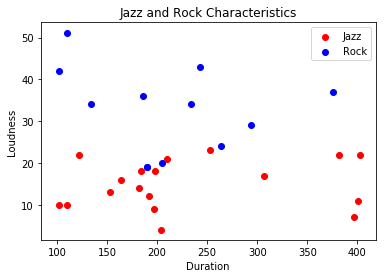

In [2]:
# K nearest neighbor classifier code 
# Is music Rock or Jazz?

music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]


# Look at our data.
plt.scatter(
    music[music['jazz'] == 1].duration,
    music[music['jazz'] == 1].loudness,
    color='red'
)
plt.scatter(
    music[music['jazz'] == 0].duration,
    music[music['jazz'] == 0].loudness,
    color='blue'
)
plt.legend(['Jazz', 'Rock'])
plt.title('Jazz and Rock Characteristics')
plt.xlabel('Duration')
plt.ylabel('Loudness')
plt.show()

In [3]:
music.head()

,duration,loudness,jazz
0,184,18,1
1,134,34,0
2,243,43,0
3,186,36,0
4,122,22,1


Nearest Neighbor is the most simple form of a similarity model. It works very simply: when trying to predict an observation, we find the closest (/nearest) known observation in our training data and use that value to make our prediction. Here we'll use the model as a classifier, the outcome of interest will be a category (in this case, rock or jazz).

To find which observation is "nearest" we need some kind of way to measure distance. Typically we use _Euclidean distance_, the standard distance measure that you're familiar with from geometry. With one observation in n-dimensions $(x_1, x_2, ...,x_n)$ and the other $(w_1, w_2,...,w_n)$:

$$ \sqrt{(x_1-w_1)^2 + (x_2-w_2)^2+...+(x_n-w_n)^2} $$

You might recognize this formula, (taking distances, squaring them, adding the squares together, and taking the root) as a generalization of the [Pythagorean theorem](https://en.wikipedia.org/wiki/Pythagorean_theorem) into n-dimensions. You can technically define any distance measure you want, and there are times where this customization may be valuable. As a general standard, however, we'll use Euclidean distance.

Now that we have a distance measure from each point in our training data to the point we're trying to predict the model can find the datapoint with the smallest distance and then apply that category to our prediction.

Let's try running this model, using the SKLearn package.

In [6]:
# Import the needed package
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

# 0 is rock (not jazz), 1 is jazz

## Predict for a song with 24 loudness that's 190 seconds long.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict([[54, 320]]))
print(neighbors.predict([[100, 700]]))

[0]
[0]
[1]


We talked about nearest neighbor and the above is k-nearest neighbor, but they aren't that different. __K Nearest Neighbor (KNN)__ is the logical extension of Nearest Neighbor. Instead of looking at just the single nearest datapoint to predict an outcome, we look at several of the nearest neighbors, with $k$ representing the number of neighbors we choose to look at. Each of the $k$ neighbors gets to vote on what the predicted outcome should be. 

This does a couple of valuable things. Firstly, it smooths out the predictions. If only one neighbor gets to influence the outcome, the model explicitly overfits to the training data. Any single outlier can create pockets of one category prediction surrounded by a sea of the other category.

This also means instead of just predicting classes, we get implicit probabilities. If each of the $k$ neighbors gets a vote on the outcome, then the probability of the test example being from any given class $i$ is:
$$ \frac{votes_i}{k} $$

And this applies for all classes present in the training set. Our example only has two classes, but this model can accommodate as many classes as the data set necessitates. To come up with a classifier prediction it simply takes the class for which that fraction is maximized.

Let's expand our initial nearest neighbors model from above to a KNN with a $k$ of 5.

In [8]:

neighbors = KNeighborsClassifier(n_neighbors=5) # Set the number of neighbors
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)


## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]])) #Probability? Yes. 0.4 votes for Rock and 3 for Jazz

[1]
[[0.4 0.6]]


Now our test prediction has changed. In using the five nearest neighbors it appears that there were two votes for rock and three for jazz, so it was classified as a jazz song. This is different than our simpler Nearest Neighbors model. While the closest observation was in fact rock, there are more jazz songs in the nearest $k$ neighbors than rock.

We can visualize our decision bounds with something called a _mesh_. This allows us to generate a prediction over the whole space. Read the code below and make sure you can pull out what the individual lines do, consulting the documentation for unfamiliar methods if necessary.

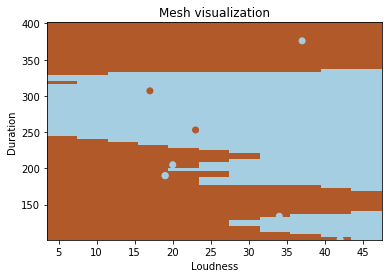

The area in blue would be predicted to be jazz, while the area in brown would be predicted as rock


In [10]:
# Building the Mesh

# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()
print("The area in blue would be predicted to be jazz, while the area in brown would be predicted as rock")

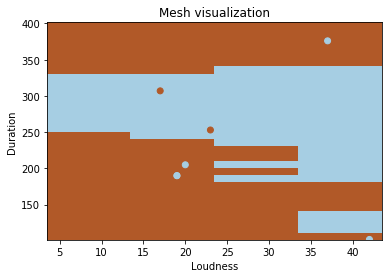

The area in blue would be predicted to be jazz, while the area in brown would be predicted as rock


In [11]:
# Play with mesh sizes

# Mesh size 10

# Building the Mesh

# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 10.0

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()
print("The area in blue would be predicted to be jazz, while the area in brown would be predicted as rock")
print("Mesh size 10 computes very quickly with very blocky lines, but can still predict")

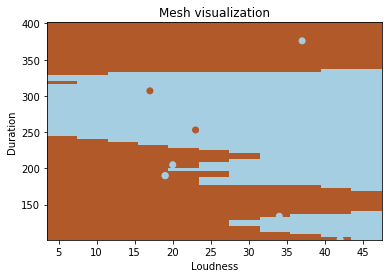

In [25]:
# Playing with mesh sizes, let's define first

# Our data. Converting from data frames to arrays for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = 4.0

def mesh_plot(h):
    # Plot the decision boundary. We assign a color to each point in the mesh.
    x_min = X[:, 0].min() - .5
    x_max = X[:, 0].max() + .5
    y_min = X[:, 1].min() - .5
    y_max = X[:, 1].max() + .5
    xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
    )
    Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot.
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(6, 4))
    plt.set_cmap(plt.cm.Paired)
    plt.pcolormesh(xx, yy, Z)

    # Add the training points to the plot.
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.xlabel('Loudness')
    plt.ylabel('Duration')
    plt.title('Mesh visualization')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    plt.show()
mesh_plot(h)

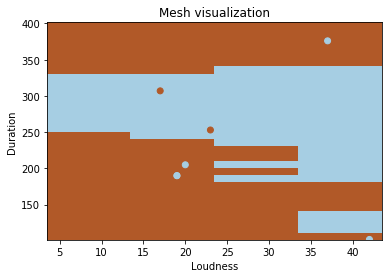

h = 10.0 plotted in 0.16801382599987846


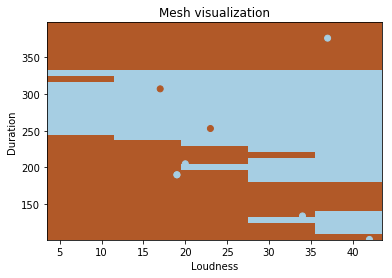

h = 8.0 plotted in 0.16583842600039134


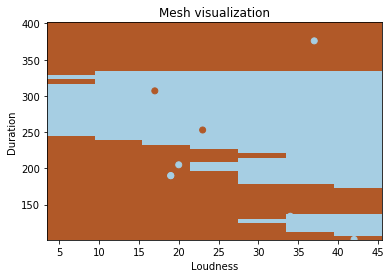

h = 6.0 plotted in 0.1917527720001999


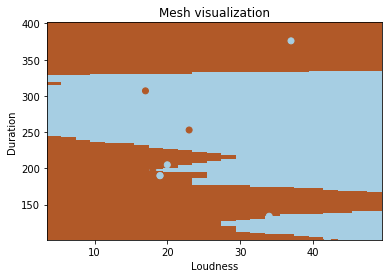

h = 2.0 plotted in 0.23743670000021666


In [26]:
# Play with different mesh sizes here.

#https://docs.python.org/2/library/timeit.html

import timeit
h = 10.0
start_time = timeit.default_timer()
mesh_plot(h)
elapsed = timeit.default_timer() - start_time
print ("h = {} plotted in {}".format(h, elapsed))

h = 8.0
start_time = timeit.default_timer()
mesh_plot(h)
elapsed = timeit.default_timer() - start_time
print ("h = {} plotted in {}".format(h, elapsed))

h = 6.0
start_time = timeit.default_timer()
mesh_plot(h)
elapsed = timeit.default_timer() - start_time
print ("h = {} plotted in {}".format(h, elapsed))

h = 2.0
start_time = timeit.default_timer()
mesh_plot(h)
elapsed = timeit.default_timer() - start_time
print ("h = {} plotted in {}".format(h, elapsed))